In [206]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [207]:
#reading csv file
df = pd.read_csv("C:/Users/hands/Downloads/supermarket_sales - Sheet1.csv", encoding='latin1')

In [208]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [209]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


Data Cleaning

In [210]:
df.shape

(1000, 17)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [212]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [213]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [214]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Exploratory Data Analysis-EDA

In [215]:
df.groupby(['Gender'], as_index=False)['Total'].sum()

,Gender,Total
0,Female,167882.925
1,Male,155083.824


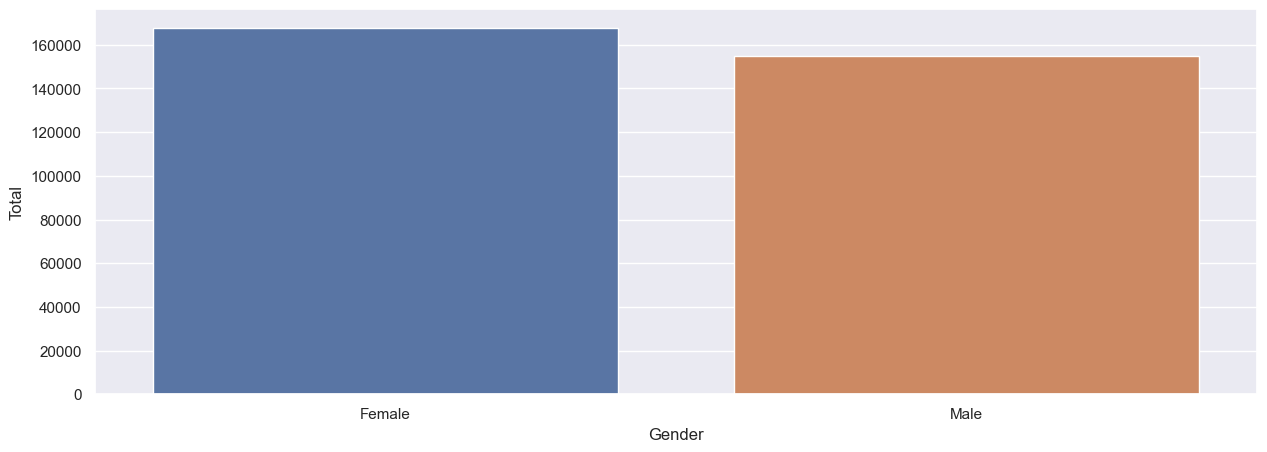

In [216]:
#plotting bar graph on gender vs total
results = df.groupby(['Gender'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)

sns.barplot(x = 'Gender',y= 'Total',data = results)
sns.set(rc={'figure.figsize':(15,5)})

In [217]:
df.groupby(['City'], as_index=False)['Total'].sum()

,City,Total
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


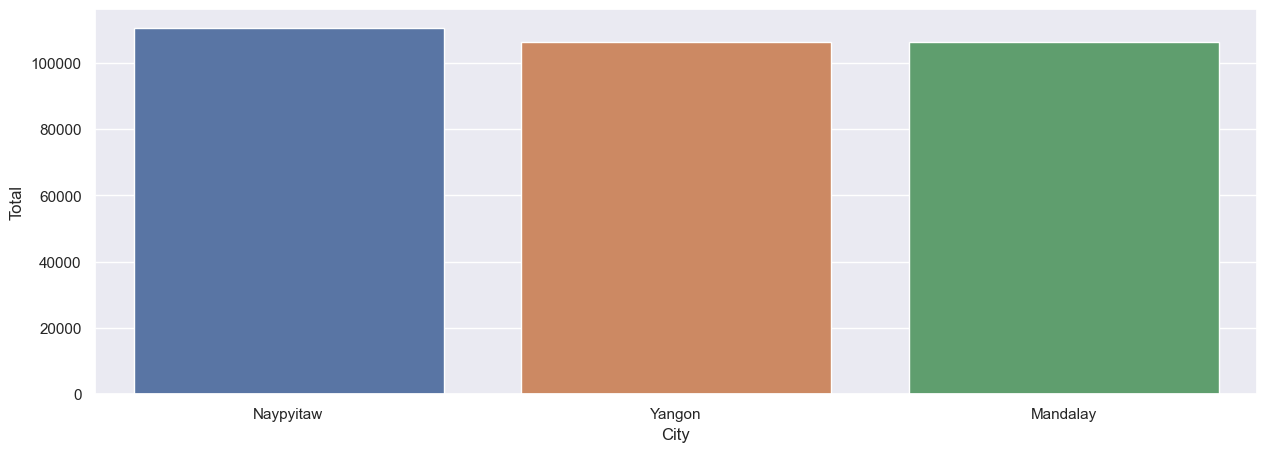

In [218]:
#plotting bar graph on city vs total
results=df.groupby(['City'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x = 'City',y= 'Total' ,data = results)
sns.set(rc={'figure.figsize':(15,5)})

In [219]:
df.groupby(['Payment'], as_index=False)['Total'].sum()

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


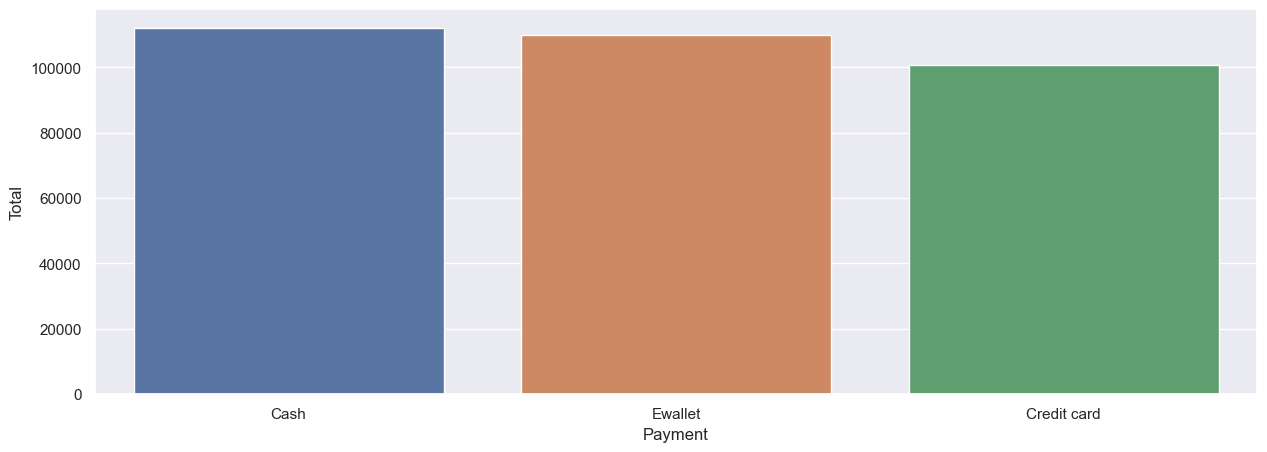

In [220]:
#plotting bar graph on payment vs total
results=df.groupby(['Payment'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x = 'Payment',y= 'Total' ,data = results)
sns.set(rc={'figure.figsize':(15,5)})

In [221]:
df.groupby(['Customer type'], as_index=False)['Total'].sum()

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


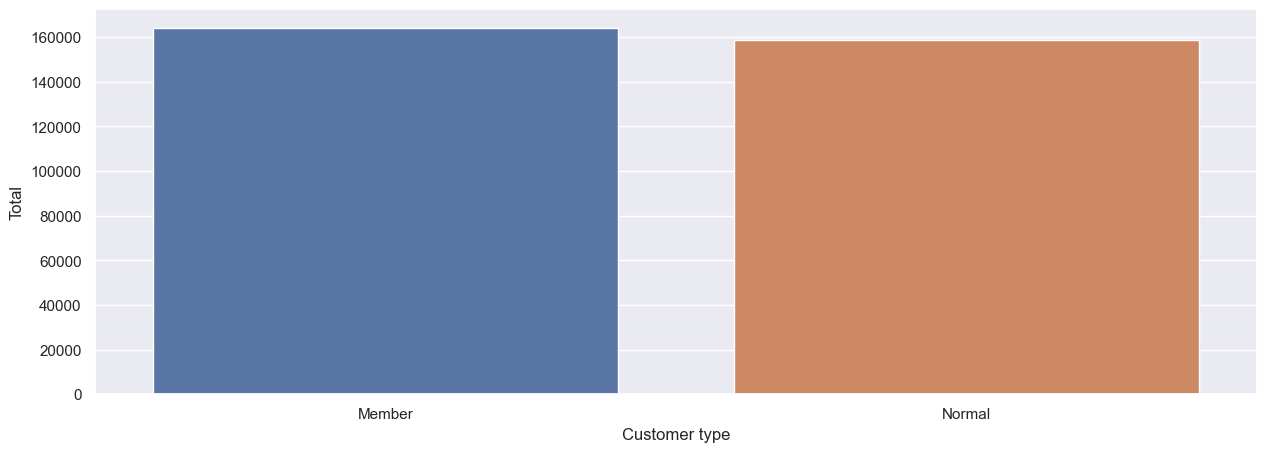

In [222]:
#plotting bar graph on customer type vs total
results=df.groupby(['Customer type'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x = 'Customer type',y= 'Total' ,data = results)
sns.set(rc={'figure.figsize':(15,5)})

In [223]:
df.groupby(['Product line'], as_index=False)['Total'].sum()

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


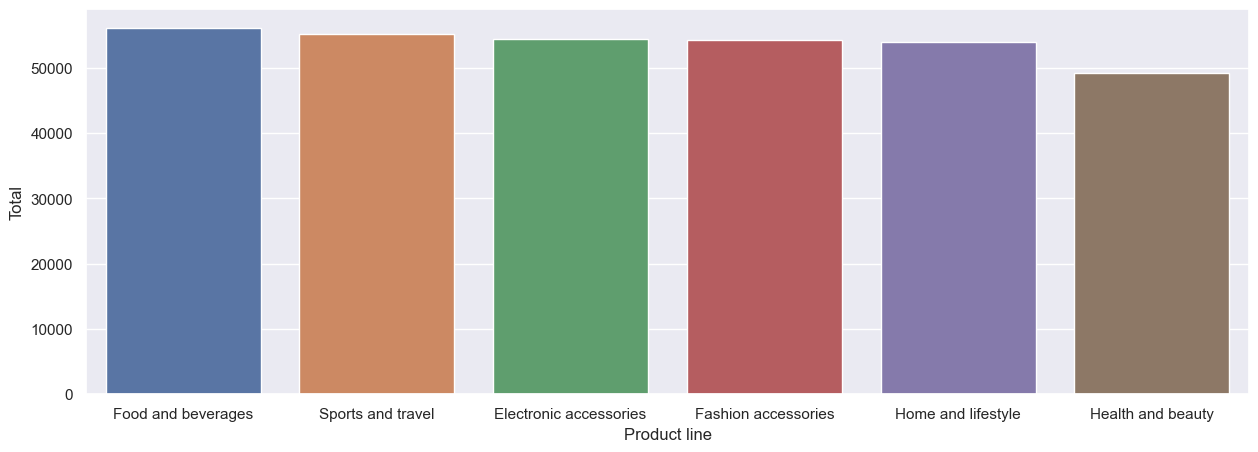

In [224]:
#plotting bar graph on product line vs total
results=df.groupby(['Product line'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x = 'Product line',y= 'Total' ,data = results)
sns.set(rc={'figure.figsize':(15,5)})

In [225]:
#Extracting the month from the date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [226]:
df.groupby('Month').sum()

C:\Users\hands\AppData\Local\Temp\ipykernel_25812\428957301.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').sum()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


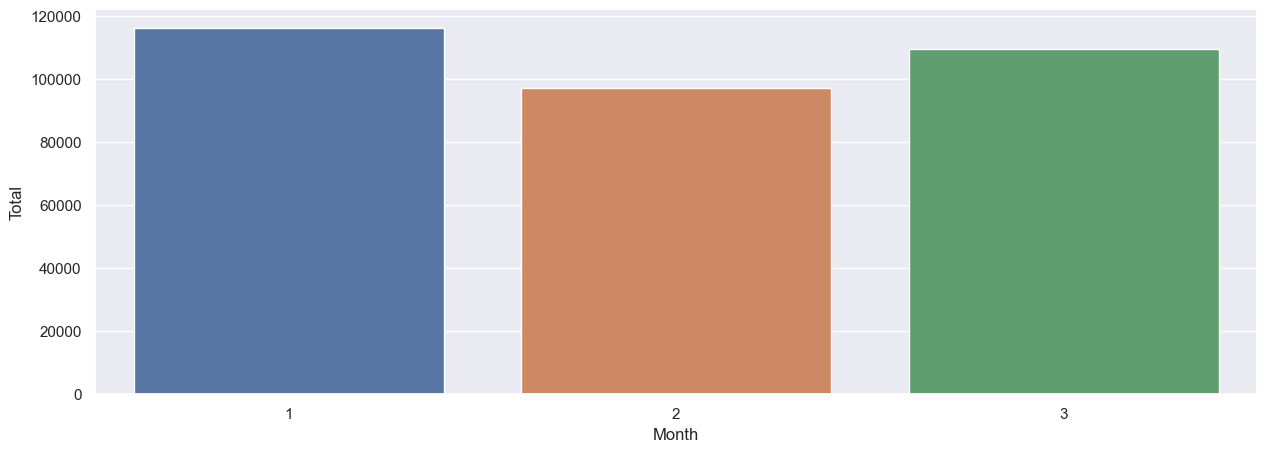

In [227]:
#plotting bar graph on month vs total
results=df.groupby(['Month'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x = 'Month',y= 'Total' ,data = results)
sns.set(rc={'figure.figsize':(15,5)})

<AxesSubplot: xlabel='Date', ylabel='Total'>

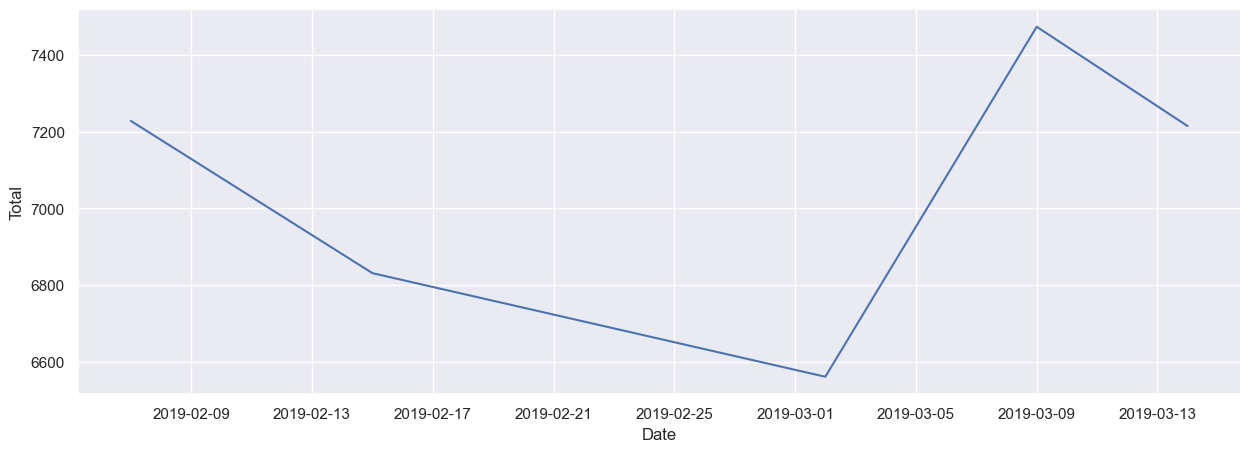

In [228]:
#plotting bar graph on Date vs top 5 totals
S_data = df.groupby(['Date'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).head(5)

# Extract only the date component
S_data['Date'] = S_data['Date'].dt.date

sns.set(rc={'figure.figsize': (15,5)})
sns.lineplot(data=S_data, x='Date', y='Total')

<AxesSubplot: xlabel='Date', ylabel='Total'>

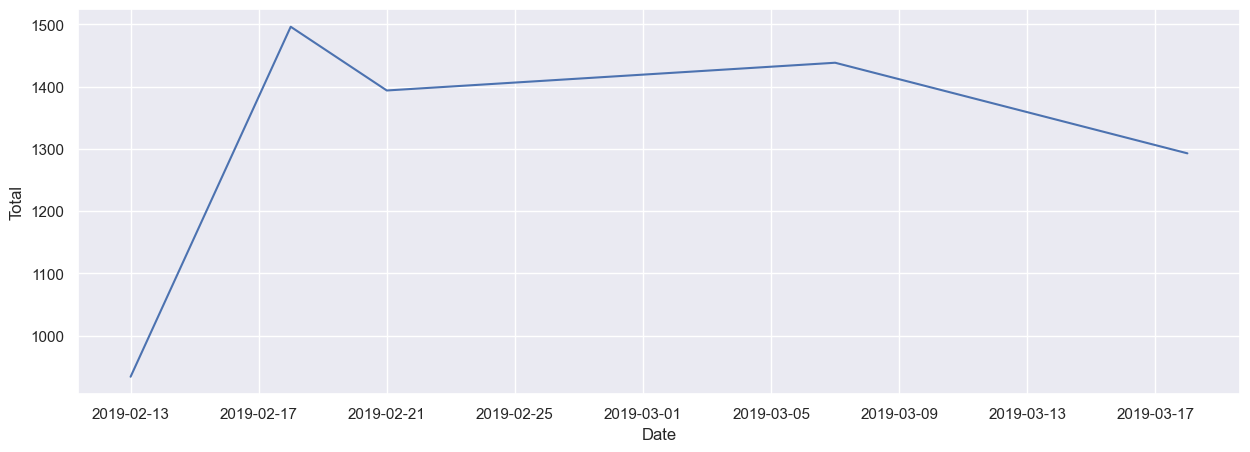

In [229]:
#plotting bar graph on Date vs buttom 5 totals
S_data = df.groupby(['Date'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).tail(5)

# Extract only the date component
S_data['Date'] = S_data['Date'].dt.date

sns.set(rc={'figure.figsize': (15,5)})
sns.lineplot(data=S_data, x='Date', y='Total')

Based on this supermarket sales analysis, we can conclude that most females from Naypyitaw city use cash as the payment method to buy food and beverages as members in the supermarket. The highest number of payments was recorded in the month of January, with the highest total occurring on 9th March, while the lowest total was observed on 13th February.